<h2>HOUSE PRICING REGRESSION</h2>

<h3>1. IMPORTING THE NECESSARY LIBRARY</h3>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as XGB
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings("ignore")

<h2>2. DATA VISUALIZATION</h2>

<h4>Reading train and test data</h4>

In [2]:
X = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv') 
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
y=X.SalePrice
X.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h4>Tain Data Description</h4>

In [3]:
X.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<h4>Using Z-score to detect outliers</h4>

In [4]:
numeric_cols = [col for col in X.columns if X[col].dtype in ['int64','float64']]
z = np.abs(stats.zscore(X[numeric_cols]))
threshold = 3
print(np.where(z > 3))

(array([   1,    3,    5,    7,    8,    9,    9,   17,   24,   26,   28,
         33,   37,   39,   41,   46,   48,   48,   50,   51,   52,   53,
         53,   53,   53,   55,   58,   64,   70,   72,   74,   78,   80,
         88,   88,   93,   93,   93,  102,  104,  113,  116,  116,  118,
        120,  125,  125,  129,  129,  137,  137,  144,  144,  153,  154,
        159,  165,  165,  166,  166,  166,  169,  170,  176,  176,  178,
        178,  178,  182,  185,  185,  185,  185,  185,  185,  185,  187,
        188,  188,  188,  189,  189,  191,  196,  197,  197,  197,  197,
        197,  198,  201,  205,  213,  215,  218,  218,  224,  224,  224,
        233,  237,  241,  245,  246,  246,  249,  249,  250,  251,  253,
        253,  258,  260,  260,  263,  263,  267,  271,  273,  278,  280,
        289,  291,  291,  293,  297,  298,  298,  299,  300,  304,  304,
        304,  304,  306,  309,  312,  312,  313,  313,  313,  314,  314,
        322,  325,  326,  328,  330,  330,  330,  

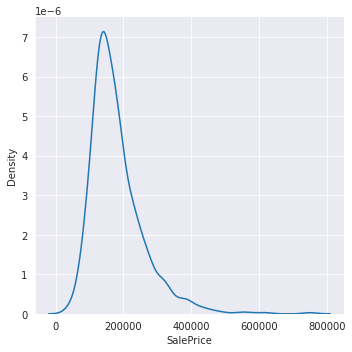

In [5]:
sns.set_style("darkgrid")
sns.displot(X, x=y, kind="kde")

<h4>Normalizing data</h4>

Text(0.5, 1.0, 'normalized data')

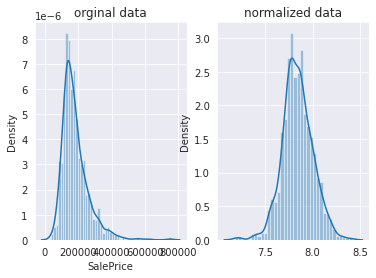

In [6]:
normalized_data=stats.boxcox(y)
fig,ax = plt.subplots(1,2)
sns.distplot(y,ax=ax[0])
ax[0].set_title("orginal data")
sns.distplot(normalized_data[0] , ax=ax[1])
ax[1].set_title("normalized data")

# Important Information :

Ok now we fixed positive sekew.We normalized the target using boxcox transformation.


<AxesSubplot:>

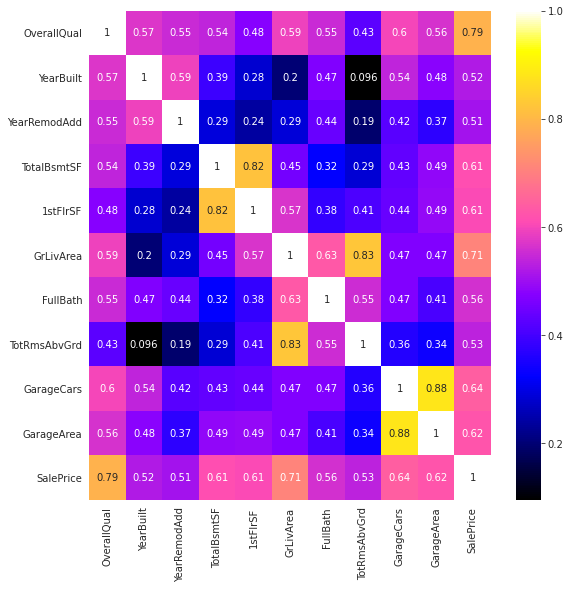

In [7]:
cor=X.corr()
high_cor=cor.index[cor["SalePrice"]>.5]
plt.figure(figsize=(9,9))
sns.heatmap(X[high_cor].corr(),annot=True,cmap='gnuplot2')

# Improtant Information :

1. Here we see correlation of all features based on saleprice or target.

2. GarageCars and GarageArea both are high correlation with each others (0.88)

3. TotRmsAbvGrd and GrLivArea both are high correlation with each others(0.83)

4. TotalBsmtSF and 1stFlrSF both are high correlation with each others(0.82)

In [8]:
cor['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

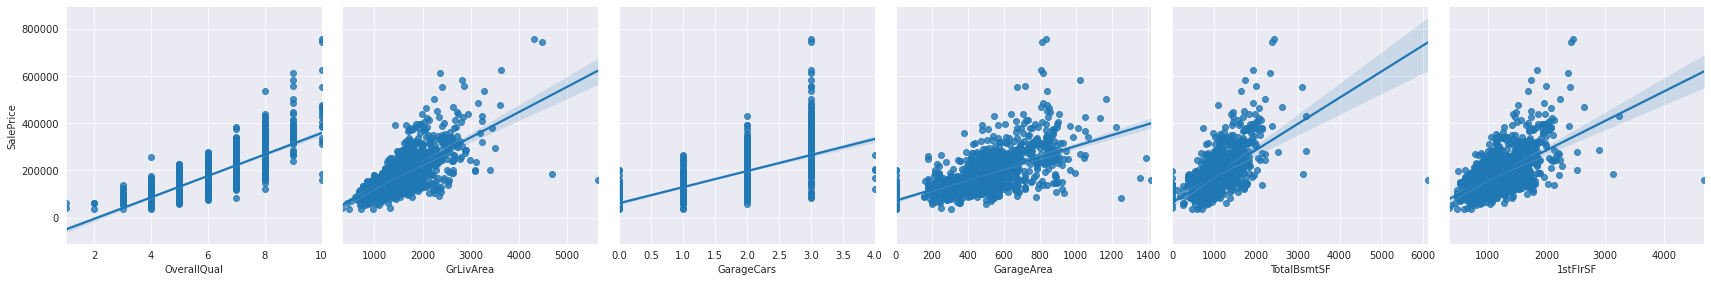

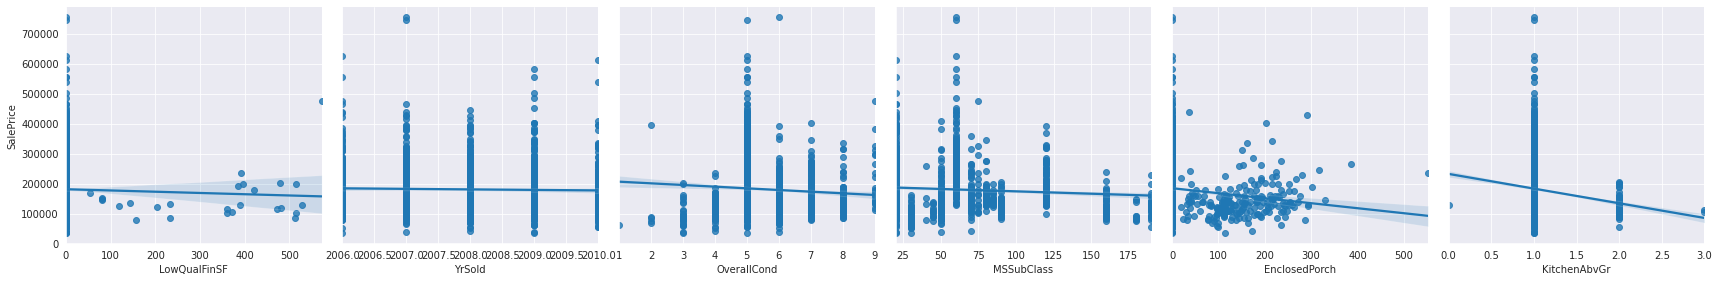

In [9]:
high_cor_feature = sns.PairGrid(X, y_vars=["SalePrice"], x_vars=["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"], height=4)
high_cor_feature.map(sns.regplot)

low_cor_feature = sns.PairGrid(X, y_vars=["SalePrice"], x_vars=["LowQualFinSF","YrSold","OverallCond","MSSubClass","EnclosedPorch","KitchenAbvGr"], height=4)
low_cor_feature.map(sns.regplot)

# Important Information:

1. High correlation features draw a possitive regression line with saleprice or target.

2. Low correlation features draw a negative regression line with saleprice or target.


# 1. OVERALLQUAL

In [10]:
print (X[['OverallQual', 'SalePrice']].groupby(['OverallQual'], as_index=False).mean())

   OverallQual      SalePrice
0            1   50150.000000
1            2   51770.333333
2            3   87473.750000
3            4  108420.655172
4            5  133523.347607
5            6  161603.034759
6            7  207716.423197
7            8  274735.535714
8            9  367513.023256
9           10  438588.388889


# 2. MSZONING

In [11]:
print(X[['MSZoning', 'SalePrice']].groupby(['MSZoning'], as_index=False).mean())


  MSZoning      SalePrice
0  C (all)   74528.000000
1       FV  214014.061538
2       RH  131558.375000
3       RL  191004.994787
4       RM  126316.830275


# 3. GRLIVAREA

In [12]:
X['CategoricalGrLivArea'] = pd.cut(X['GrLivArea'], 5)
print(X[['CategoricalGrLivArea','SalePrice']].groupby(['CategoricalGrLivArea'], as_index=False).mean())

  CategoricalGrLivArea      SalePrice
0    (328.692, 1395.6]  132458.402421
1     (1395.6, 2457.2]  209856.795580
2     (2457.2, 3518.8]  314621.333333
3     (3518.8, 4580.4]  650000.000000
4     (4580.4, 5642.0]  172375.000000


# 4. GARAGECARS

In [13]:
print(X[['GarageCars','SalePrice']].groupby(['GarageCars'], as_index=False).mean())

   GarageCars      SalePrice
0           0  103317.283951
1           1  128116.688347
2           2  183851.663835
3           3  309636.121547
4           4  192655.800000


# 5. TOTALBSMTSF

In [14]:
X['CategoricalTotalBsmtSF'] = pd.cut(X['TotalBsmtSF'], 5)
print(X[['CategoricalTotalBsmtSF','SalePrice']].groupby(['CategoricalTotalBsmtSF'], as_index=False).mean())

  CategoricalTotalBsmtSF      SalePrice
0        (-6.11, 1222.0]  153526.177043
1       (1222.0, 2444.0]  244615.967059
2       (2444.0, 3666.0]  366375.000000
3       (3666.0, 4888.0]            NaN
4       (4888.0, 6110.0]  160000.000000


# 6. 1STFLRSF

In [15]:
X['Categorical1stFlrSF'] = pd.cut(X['1stFlrSF'], 5)
print(X[['Categorical1stFlrSF','SalePrice']].groupby(['Categorical1stFlrSF'], as_index=False).mean())

  Categorical1stFlrSF      SalePrice
0   (329.642, 1205.6]  150379.302222
1    (1205.6, 2077.2]  223830.560150
2    (2077.2, 2948.8]  358038.640000
3    (2948.8, 3820.4]  307375.000000
4    (3820.4, 4692.0]  160000.000000


# 7. YRSOLD

In [16]:
print (X[['YrSold', 'SalePrice']].groupby(['YrSold'], as_index=False).mean())

   YrSold      SalePrice
0    2006  182549.458599
1    2007  186063.151976
2    2008  177360.838816
3    2009  179432.103550
4    2010  177393.674286


# 8. KITCHENABVGR

In [17]:
print (X[['KitchenAbvGr', 'SalePrice']].groupby(['KitchenAbvGr'], as_index=False).mean())

   KitchenAbvGr      SalePrice
0             0  127500.000000
1             1  183388.790230
2             2  131096.153846
3             3  109500.000000


# 9. YEARBUILT

In [18]:
X['CategoricalYearBuilt'] = pd.cut(X['YearBuilt'], 5)
print (X[['CategoricalYearBuilt', 'SalePrice']].groupby(['CategoricalYearBuilt'], as_index=False).mean())

  CategoricalYearBuilt      SalePrice
0   (1871.862, 1899.6]  180458.600000
1     (1899.6, 1927.2]  125605.169811
2     (1927.2, 1954.8]  134707.981043
3     (1954.8, 1982.4]  152570.409091
4     (1982.4, 2010.0]  235531.950931


# 10. OVERALLCOND 


In [19]:
X['CategoricalOverallCond'] = pd.cut(X['OverallCond'], 5)
print (X[['CategoricalOverallCond', 'SalePrice']].groupby(['CategoricalOverallCond'], as_index=False).mean())

  CategoricalOverallCond      SalePrice
0           (0.992, 2.6]  128488.666667
1             (2.6, 4.2]  114795.439024
2             (4.2, 5.8]  203146.914738
3             (5.8, 7.4]  155838.393873
4             (7.4, 9.0]  169776.861702


# Observation :
 Look at the variation of saleprice. High correlation features impact more on saleprice, on the other hand low correlation features impact less on saleprice . Here YrSold and KitchenAbvGr impact less on saleprice and yearbuilt has an impact on the SalesPrice.Here from 2006-2010 house price remains same on average.

<h3>3. Data Clean</h3>

In [20]:
#Droped the target variable, the train and test data

test_id = test['Id']
total_data = pd.concat([X, test], axis=0, sort=False)
total_data = total_data.drop(['Id', 'SalePrice'], axis=1)

In [21]:
#Count Missing values and the percentage of missing values

missing_values_count = total_data.isnull().sum().sort_values(ascending=False)
percent= (total_data.isnull().sum() / total_data.isnull().count().sort_values(ascending=False)*100)
missing_data = pd.concat([missing_values_count,percent], axis=1, keys=['missing', 'percent'])
missing_data.head(10)

,missing,percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
CategoricalOverallCond,1459,49.982871
CategoricalYearBuilt,1459,49.982871
Categorical1stFlrSF,1459,49.982871
CategoricalTotalBsmtSF,1459,49.982871
CategoricalGrLivArea,1459,49.982871
FireplaceQu,1420,48.646797


In [22]:
total_data.drop(missing_data[missing_data['missing']>4].index,axis=1,inplace=True)
#total_data.drop(['Name'],axis=1,inplace=True)
a=total_data.isnull().sum().sort_values(ascending=False)

a.head(20)

MSZoning        4
Functional      2
BsmtFullBath    2
BsmtHalfBath    2
Utilities       2
BsmtFinSF2      1
Exterior2nd     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
BsmtUnfSF       1
Exterior1st     1
TotalBsmtSF     1
Electrical      1
SaleType        1
KitchenQual     1
HalfBath        0
FullBath        0
BedroomAbvGr    0
KitchenAbvGr    0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
object_cols = [col for col in total_data.columns if total_data[col].dtype == "object"]
label_encoder=LabelEncoder()
for col in object_cols:
    total_data[col]=label_encoder.fit_transform(total_data[col])
total_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   int64  
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   int64  
 4   LotShape       2919 non-null   int64  
 5   LandContour    2919 non-null   int64  
 6   Utilities      2919 non-null   int64  
 7   LotConfig      2919 non-null   int64  
 8   LandSlope      2919 non-null   int64  
 9   Neighborhood   2919 non-null   int64  
 10  Condition1     2919 non-null   int64  
 11  Condition2     2919 non-null   int64  
 12  BldgType       2919 non-null   int64  
 13  HouseStyle     2919 non-null   int64  
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyl

In [24]:
from sklearn.impute import SimpleImputer
numeric_cols = [col for col in total_data.columns if total_data[col].dtype in ['int64','float64']]
my_imputer=SimpleImputer(strategy='median')
data = pd.DataFrame(my_imputer.fit_transform(total_data))
data.columns = total_data.columns
a=data.isnull().sum().sort_values(ascending=False)
a.head(10)

MSSubClass      0
CentralAir      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
dtype: int64

<h3>4. Feature Engineering</h3>

In [25]:
skewed_feats = data[numeric_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
for feature in skewed_feats.index:
    data[feature] = np.log1p(data[feature])

<h4>Separating the Train and Test Data</h4>

In [26]:
x_train =data[:len(y)]
x_test = data[len(y):]
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   Street         1460 non-null   float64
 4   LotShape       1460 non-null   float64
 5   LandContour    1460 non-null   float64
 6   Utilities      1460 non-null   float64
 7   LotConfig      1460 non-null   float64
 8   LandSlope      1460 non-null   float64
 9   Neighborhood   1460 non-null   float64
 10  Condition1     1460 non-null   float64
 11  Condition2     1460 non-null   float64
 12  BldgType       1460 non-null   float64
 13  HouseStyle     1460 non-null   float64
 14  OverallQual    1460 non-null   float64
 15  OverallCond    1460 non-null   float64
 16  YearBuilt      1460 non-null   float64
 17  YearRemodAdd   1460 non-null   float64
 18  RoofStyl

<h3>Machine Learning</h3>


<h4>1. Using XGBOOST</h4>


In [27]:

model =XGB.XGBRegressor(n_estimators=2000, learning_rate=0.05, n_jobs=4)
model.fit(x_train, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<h4> Predicting </h4>


In [28]:
predictions = model.predict(x_test)


In [29]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = predictions
sub.to_csv('mysubmission.csv',index=False)
sub.head(10)

,Id,SalePrice
0,1461,127148.593750
1,1462,158048.656250
2,1463,183729.218750
3,1464,187819.812500
4,1465,196973.468750
5,1466,172649.109375
6,1467,173481.140625
7,1468,169075.796875
8,1469,178845.062500
9,1470,121776.367188
